In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from datetime import datetime, timedelta
import helper as hp
plt.style.use('ggplot')

### Setting path to the data file (.csv) & read in dataframe

In [159]:
data_path ='~/Desktop/capstone/data/Denver_1940_2010.csv'
raw_data_df = pd.read_csv(data_path, low_memory=False)

### Collect relevant data & clean a little bit

In [168]:
dates_r = hp.grab_datetime(raw_data_df)
PRCP_r = hp.grab_col_data(raw_data_df, 'PRCP')
TMAX_r = hp.grab_col_data(raw_data_df, 'TMAX')
TMIN_r = hp.grab_col_data(raw_data_df, 'TMIN')
SNWD_r = hp.grab_col_data(raw_data_df, 'TMIN')

In [169]:
PRCP_d = hp.GHCN_Data(PRCP_r, dates_r, *hp.trim_col_data(PRCP_r))
TMAX_d = hp.GHCN_Data(TMAX_r, dates_r, *hp.trim_col_data(TMAX_r))
TMIN_d = hp.GHCN_Data(TMIN_r, dates_r, *hp.trim_col_data(TMIN_r))
SNWD_d = hp.GHCN_Data(SNWD_r, dates_r, *hp.trim_col_data(SNWD_r))

In [162]:
TMAX_d.set_data_by_year()
TMIN_d.set_data_by_year()
SNWD_d.set_data_by_year()


In [167]:
#TMAX_d.data_yr[1948]
#TMAX_d.data_yr[TMAX_d.data_yr['Month_id']==1][1948].values
TMAX_d.data_yr

,Month_id,1948,1949,1950,1951,1952,1953,1954,1955,1956,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,43.0,51.0,58.0,28.0,16.0,39.0,54.0,46.0,56.0,...,7.0,55.0,25.0,57.0,31.0,26.0,39.0,21.0,22.0,50.0
1,1,47.0,29.0,54.0,36.0,32.0,39.0,45.0,51.0,53.0,...,22.0,35.0,32.0,37.0,25.0,39.0,50.0,30.0,14.0,52.0
2,1,56.0,8.0,5.0,40.0,31.0,49.0,59.0,40.0,56.0,...,38.0,54.0,32.0,46.0,41.0,47.0,52.0,44.0,44.0,47.0
3,1,57.0,24.0,8.0,49.0,48.0,49.0,50.0,44.0,67.0,...,30.0,60.0,40.0,63.0,33.0,49.0,32.0,55.0,56.0,48.0
4,1,53.0,38.0,28.0,38.0,39.0,54.0,53.0,30.0,72.0,...,42.0,62.0,50.0,22.0,29.0,46.0,12.0,52.0,63.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,12,47.0,56.0,55.0,49.0,46.0,39.0,21.0,65.0,60.0,...,51.0,24.0,52.0,19.0,21.0,43.0,11.0,36.0,37.0,NaN
362,12,34.0,60.0,42.0,57.0,47.0,48.0,24.0,42.0,55.0,...,50.0,29.0,59.0,32.0,28.0,51.0,54.0,31.0,35.0,NaN
363,12,35.0,60.0,40.0,45.0,45.0,36.0,38.0,31.0,62.0,...,55.0,32.0,58.0,40.0,30.0,49.0,47.0,23.0,26.0,NaN
364,12,45.0,58.0,52.0,36.0,50.0,45.0,40.0,47.0,62.0,...,58.0,36.0,40.0,18.0,23.0,43.0,64.0,41.0,31.0,NaN


In [47]:
def signal_avg(Y, time_avg):
    Y_avg = []
    for idx in range(0,len(Y)-time_avg):
        Y_avg.append(Y[idx:idx+time_avg].mean())
    return Y_avg

def plot_year(ax, df, year, time_avg=1):
    Y_val = df[year].values
    if time_avg > 1:
        Y = signal_avg(Y_val, time_avg)
        
    ax.plot(Y, label=str(year))
    
def plot_month(ax, df, year, month, time_avg=1):
    Y_val = df[df['Month_id']==month][year].values
    if time_avg > 1:
        Y = signal_avg(Y_val, time_avg)
    ax.plot(Y, label=str(year))

In [147]:
def plot_year_avg_bar(ax, df, years, lab):
    Y = []
    for year in years:
        Y.append(np.nanmean(df[year].values))
    ax.bar(list(years), Y, label = lab)

def plot_year_avg_scatter(ax, df, years, lab):
    Y = []
    for year in years:
        Y.append(np.nanmean(df[year].values))
    ax.scatter(list(years), Y, label = lab)
    
def plot_month_avg_bar(ax, df, months, years, lab):
    Y = []
    for year in years:
        Y.append(np.nanmean(df[df['Month_id']==months][year].values))
    ax.bar(years, Y, label = lab)
    
def plot_month_avg_scatter(ax, df, months, years, lab):
    Y = []
    for year in years:
        Y.append(np.nanmean(df[df['Month_id']==months][year].values))
    ax.scatter(years, Y, label = lab)

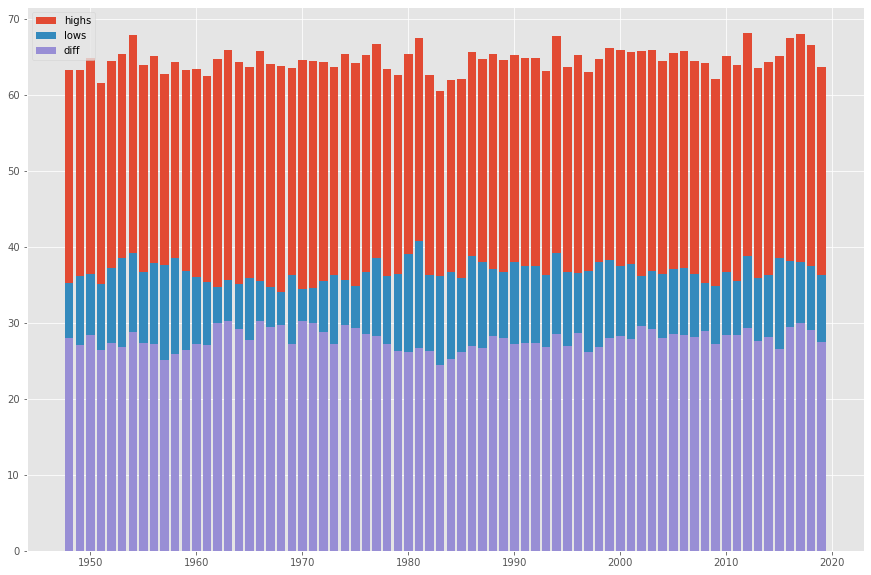

In [124]:
fig, ax = plt.subplots(1, figsize=(15,10))
r = list(range(TMAX_d.startyr,TMAX_d.endyr))
plot_year_avg_bar(ax, TMAX_d.data_yr, r, 'highs')
plot_year_avg_bar(ax, TMIN_d.data_yr, r, 'lows')
diff = TMAX_d.data_yr.iloc[:,1:] - TMIN_d.data_yr.iloc[:,1:]
plot_year_avg_bar(ax, diff, r, 'diff')
ax.legend();

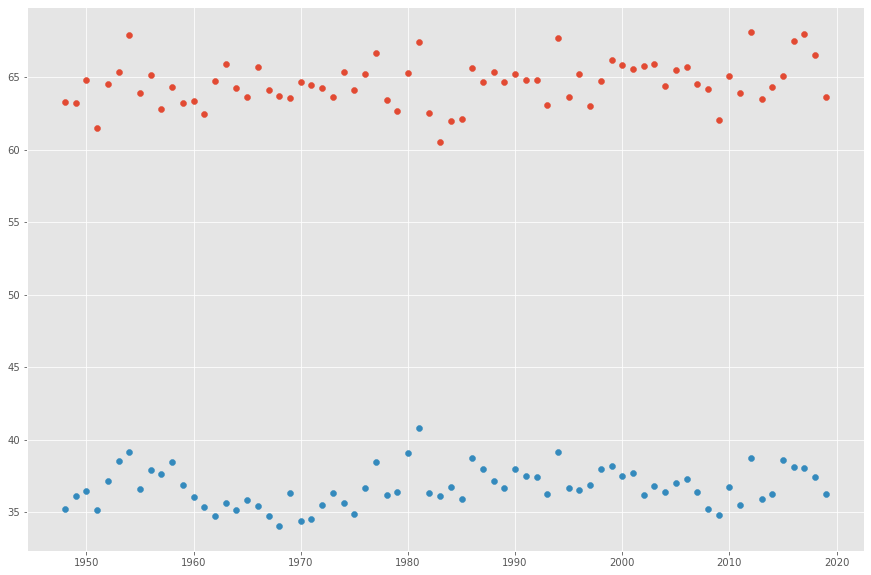

In [125]:
fig, ax = plt.subplots(1, figsize=(15,10))
r = list(range(TMAX_d.startyr,TMAX_d.endyr))
plot_year_avg_scatter(ax, TMAX_d.data_yr, r, 'highs')
plot_year_avg_scatter(ax, TMIN_d.data_yr, r, 'lows')
# diff = TMAX_d.data_yr.iloc[:,1:] - TMIN_d.data_yr.iloc[:,1:]
# plot_year_avg_bar(ax, diff, r, 'diff')
# ax.legend();

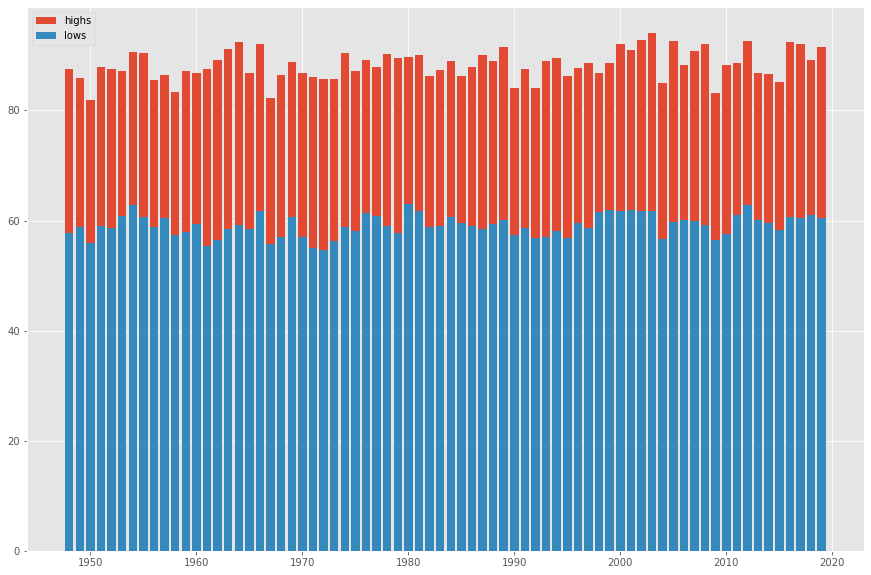

In [130]:
fig, ax = plt.subplots(1, figsize=(15,10))
r = list(range(TMAX_d.startyr,TMAX_d.endyr))

plot_month_avg_bar(ax, TMAX_d.data_yr, 7, r, 'highs')
plot_month_avg_bar(ax, TMIN_d.data_yr, 7, r, 'lows')

diff = TMAX_d.data_yr.iloc[:,1:] - TMIN_d.data_yr.iloc[:,1:]

#plot_month_avg_bar(ax, diff, 7, r, 'diff')
ax.legend();

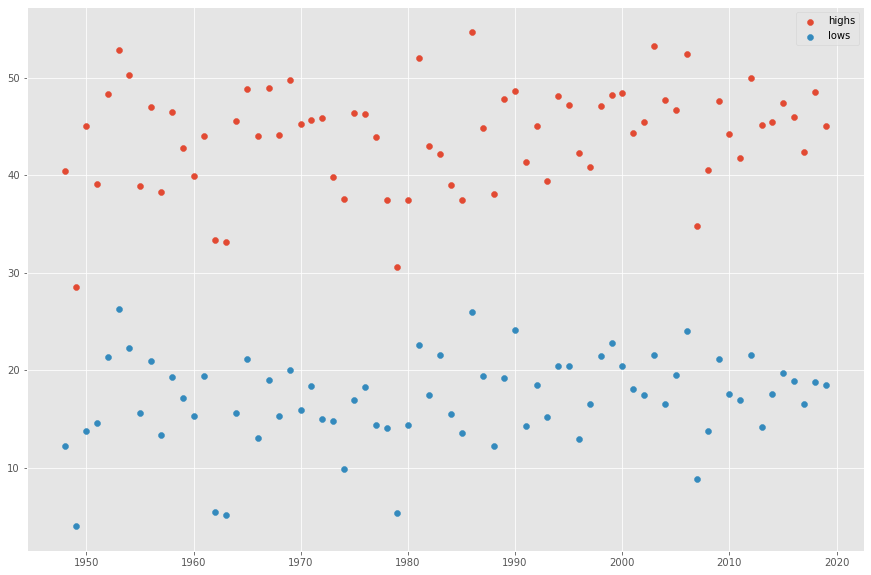

In [148]:
fig, ax = plt.subplots(1, figsize=(15,10))
r = list(range(TMAX_d.startyr,TMAX_d.endyr))

plot_month_avg_scatter(ax, TMAX_d.data_yr, 1, r, 'highs')
plot_month_avg_scatter(ax, TMIN_d.data_yr, 1, r, 'lows')

diff = TMAX_d.data_yr.iloc[:,1:] - TMIN_d.data_yr.iloc[:,1:]

#plot_month_avg_bar(ax, diff, 7, r, 'diff')
ax.legend();

In [144]:
#df = TMAX_d.data_yr
#df[df['Month_id']==2][1950]
# X = list(df[df['Month_id'].isin([12])][1949].values)
# X.extend(list(df[df['Month_id'].isin([1,2])][1950].values))
# X

In [156]:
def plot_winter_avg_bar(ax, df, years, lab):
    Y = []
    for year in years[1:]:
        season = list(df[df['Month_id']==12][year-1].values)
        season.extend(list(df[df['Month_id'].isin([1, 2])][year].values))
        
        Y.append(np.nanmean(season))
    ax.bar(years[1:], Y, label = lab)
    
def plot_winter_avg_scatter(ax, df, years, lab):
    Y = []
    for year in years[1:]:
        season = list(df[df['Month_id']==12][year-1].values)
        season.extend(list(df[df['Month_id'].isin([1, 2])][year].values))
        
        Y.append(np.nanmean(season))
    ax.scatter(years[1:], Y, label = lab)

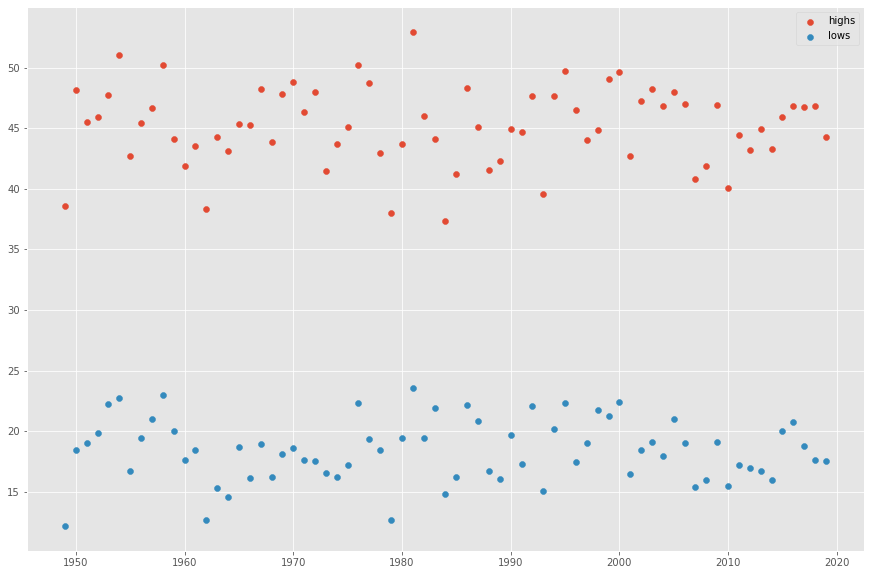

In [157]:
fig, ax = plt.subplots(1, figsize=(15,10))
r = list(range(TMAX_d.startyr,TMAX_d.endyr))

plot_winter_avg_scatter(ax, TMAX_d.data_yr, r, 'highs')
plot_winter_avg_scatter(ax, TMIN_d.data_yr, r, 'lows')

diff = TMAX_d.data_yr.iloc[:,1:] - TMIN_d.data_yr.iloc[:,1:]

#plot_month_avg_bar(ax, diff, 7, r, 'diff')
ax.legend();

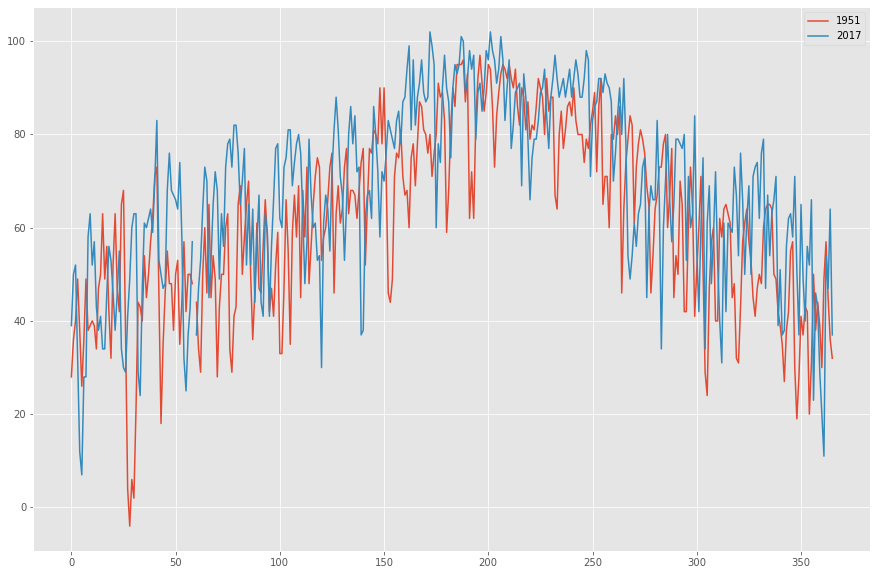

In [31]:
fig, ax = plt.subplots(1, figsize=(15,10))
for year in [1951, 2017]:
    plot_year(ax, TMAX_d.data_yr, year)
ax.legend()

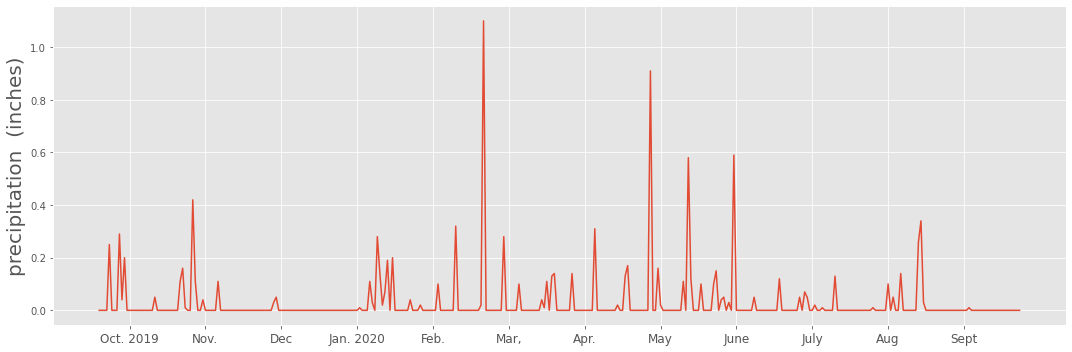

In [158]:

year=1
good = ~data['PRCP'].isna()
X_date = data['DATE'][good].to_numpy()
Y = data['PRCP'][good].to_numpy()
X = np.arange(len(X_date))
R = range(len(Y)-year*365, len(Y)-(year-1)*365)
fig, ax = plt.subplots(1, figsize=(15,5))
ax.plot(X[R],Y[R])

tags = ['Oct. 2019', 'Nov.', 'Dec', 'Jan. 2020', 'Feb.', 'Mar,', 'Apr.', 'May', 'June', 'July', 'Aug', 'Sept', ]
tickspots = list(range(len(Y)-year*365+12, len(Y)-(year-1)*365, 30))

plt.xticks(tickspots, tags, fontsize=12);
ax.set_ylabel('precipitation  (inches)',fontsize=20)
plt.tight_layout()
plt.savefig('Prec_2020.png')


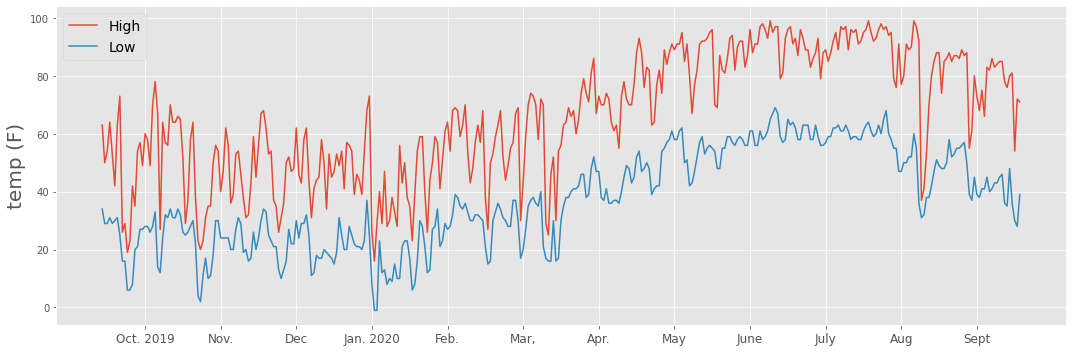

In [154]:


year = 1
good = ~data['TMAX'].isna()
X_date = data['DATE'][good].to_numpy()
Y_H = data['TMAX'][good].to_numpy()
Y_L = data['TMIN'][good].to_numpy()
X = np.arange(len(X_date))
R = range(len(Y_L)-year*365, len(Y_L)-(year-1)*365)
fig, ax = plt.subplots(1, figsize=(15,5))
ax.plot(X[R],Y_H[R], label='High')
ax.plot(X[R],Y_L[R], label='Low')

tags = ['Oct. 2019', 'Nov.', 'Dec', 'Jan. 2020', 'Feb.', 'Mar,', 'Apr.', 'May', 'June', 'July', 'Aug', 'Sept', ]
tickspots = list(range(len(Y)-year*365+12, len(Y)-(year-1)*365, 30))

plt.xticks(tickspots, tags, fontsize=12);
ax.set_ylabel('temp (F)', fontsize=20)
ax.legend(fontsize=14)
plt.tight_layout()
plt.savefig('Temp_2020.png')

In [137]:
#X
Y_H

array([43., 47., 56., ..., 54., 72., 71.])

In [90]:
X_date[R][range(12,365,30)]
#list(range(12,365,30))
tags = ['Oct. 2019', 'Nov.', 'Dec', 'Jan. 2020', 'Feb.', 'Mar,', 'Apr.', 'May', 'June', 'July', 'Aug', 'Sept', ]

In [91]:
#for col in data.columns:
#    pprint(col);
list(range(12,365,30))

[12, 42, 72, 102, 132, 162, 192, 222, 252, 282, 312, 342]

In [99]:
tickspots = list(range(len(Y)-1*365+12, len(Y), 30))

In [41]:
A = np.array([1,4,5,6,7])

In [44]:

A.mean()

4.6